# Pregunta Fiebre Amarilla

¿Cómo varían las tasas de vacunación de la fiebre amarilla en las 6 regiones de Colombia entre los años 2016-2019? 


# 0. Cargar librerías

In [41]:
# Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sys
import re
import string
import unicodedata

from joblib import dump, load

import pandas as pd
from ydata_profiling import ProfileReport

!pip install ipywidgets


zsh:1: command not found: pip


In [42]:
# Read the Excel file
depart2016 = pd.read_excel('[IN]Cobertura_Vacunacion_Departamental_2016-2019.xlsx', sheet_name = '2016')

# Display the first few rows of the data
depart2016

,Código,DEPARTAMENTOS,Población Menor 1 año (Meta Programática),BCG RECIEN NACIDO (HASTA 29 DÍAS) + MENOR UN AÑO (A PARTIR DE 30 DIAS HASTA 11 MESES 29 DIAS) DOSIS UNICA,BCG RECIEN NACIDO (HASTA 29 DÍAS) + MENOR UN AÑO (A PARTIR DE 30 DIAS HASTA 11 MESES 29 DIAS) (% DE COBERTURA),HB RECIEN NACIDO (HASTA 29 DÍAS) (D. Unica),HB RECIEN NACIDO (HASTA 29 DÍAS) (% DE COBERTURA),ANTIPOLIO INACTIVADA (VIP) PARENTERAL\n< DE 1 AÑO (1ras. Dosis),ANTIPOLIO INACTIVADA (VIP) PARENTERAL < DE 1 AÑO (% DE COBERTURA),VOP <DE1 AÑO + VIP <1AÑO 3as (3.Dosis),...,DPT 5 AÑOS (% DE COBERTURA),SRP (T.V.) 5 AÑOS (2do. Ref.),SRP (T.V.) 5 AÑOS (% DE COBERTURA),FLU de 19 a 49 años ÚNICA (UNICA),FLU de 50 años y más (UNICA),Gestantes a partir de la semana 14 (UNICA),TdaP ACELULAR GESTANTES DE 10 AÑOS Y MAS (UNICA DOSIS EN CADA EMBARAZO),TdaP ACELULAR GESTANTES DE 10 AÑOS Y MAS (% DE COBERTURA),REGION,TOTAL DOSIS
0,91.0,AMAZONAS,1802,1503,83.4,1368,75.9,1560,86.6,1445,...,80.7,1468,80.2,1441,2178,847,1077,59.8,AMAZONIA,38940
1,5.0,ANTIOQUIA,78411,75215,95.9,74126,94.5,75821,96.7,73969,...,86.2,73823,86.8,34355,228344,54930,65742,83.8,ANDINA,1953685
2,81.0,ARAUCA,4272,4415,103.3,4331,101.4,4651,108.9,4500,...,92.2,4522,92.2,2356,3169,2750,3628,84.9,LLANOS,108294
3,8.0,ATLANTICO,20672,20653,99.9,18857,91.2,19610,94.9,20551,...,97.6,20761,96.4,12536,10678,9073,12954,62.7,CARIBE,472703
4,8001.0,BARRANQUILLA,21907,22270,101.7,21851,99.7,21771,99.4,21238,...,84.3,19158,84.2,3729,24640,14731,17536,80.0,CARIBE,511235
5,11.0,BOGOTA D.C.,105191,112338,106.8,112126,106.6,99815,94.9,100535,...,83.8,92039,85.1,64269,329351,71240,91905,87.4,ANDINA,2675339
6,13.0,BOLIVAR,22708,11559,50.9,10915,48.1,17583,77.4,18024,...,85.9,19148,85.2,10608,22827,12255,13822,60.9,CARIBE,436455
7,13001.0,CARTAGENA,19368,19203,99.1,19034,98.3,18169,93.8,17234,...,81.3,15479,82.5,4708,16252,15040,15013,77.5,CARIBE,419100
8,15.0,BOYACA,16432,15612,95.0,15461,94.1,15677,95.4,15359,...,89.5,16834,89.5,5604,47547,12258,13626,82.9,ANDINA,419765
9,17.0,CALDAS,10276,9876,96.1,9726,94.6,9719,94.6,9794,...,90.7,10240,90.3,3419,37002,7119,8611,83.8,ANDINA,267862


In [43]:
# Read the Excel file
depart2017 = pd.read_excel('[IN]Cobertura_Vacunacion_Departamental_2016-2019.xlsx', sheet_name = '2017')

# Display the first few rows of the data
depart2017

,Código,DEPARTAMENTOS,Población Menor 1 año (Meta Programática),BCG RECIEN NACIDO (HASTA 29 DÍAS) + MENOR UN AÑO (A PARTIR DE 30 DIAS HASTA 11 MESES 29 DIAS) (Dosis Unica),BCG RECIEN NACIDO (HASTA 29 DÍAS) + MENOR UN AÑO (A PARTIR DE 30 DIAS HASTA 11 MESES 29 DIAS) (% DE COBERTURA),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Primeras 12 Horas) (D. Unica),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Primeras 12 Horas) (% DE COBERTURA),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Despues de las Primeras 12 Horas) (D. Unica),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Despues de las Primeras 12 Horas) (% DE COBERTURA),HB RECIEN NACIDO (HASTA 29 DÍAS) (Primeras 12 Horas)+ Despues de las primeras 12 horas (D. Unica),...,SRP (T.V.) 5 AÑOS (% DE COBERTURA),FLU de 19 a 49 años ÚNICA (UNICA),FLU de 50 años y más (UNICA),Gestantes a partir de la semana 14 (UNICA),TdaP ACELULAR GESTANTES DE 10 AÑOS Y MAS (UNICA DOSIS EN CADA EMBARAZO),TdaP ACELULAR GESTANTES DE 10 AÑOS Y MAS (% DE COBERTURA),VPH (1a),VPH (2a),VPH (3a),REGION
0,91.0,AMAZONAS,1720,1571,91.3,1321,76.8,87,5.1,1408,...,84.7,1443,1688,727,1023,59.5,861,502,6,AMAZONIA
1,5.0,ANTIOQUIA,77985,77253,99.1,63613,81.6,12024,15.4,75637,...,89.3,50233,217983,52747,67252,86.2,28044,15515,1389,ANDINA
2,81.0,ARAUCA,4561,4768,104.5,4597,100.8,20,0.4,4617,...,96.3,4074,4381,3280,4182,91.7,1191,252,1,LLANOS
3,8.0,ATLANTICO,20423,20448,100.1,18863,92.4,165,0.8,19028,...,98.6,9366,9424,9895,15155,74.2,1121,457,32,CARIBE
4,8001.0,BARRANQUILLA,21962,21887,99.7,20160,91.8,0,0.0,20342,...,95.6,8659,22946,14458,18010,82.0,544,579,115,CARIBE
5,11.0,BOGOTA D.C.,104937,109138,104.0,84233,80.3,23897,22.8,108130,...,86.4,104186,253043,66768,86079,82.0,12476,8153,2122,ANDINA
6,13.0,BOLIVAR,21542,10386,48.2,8445,39.2,1155,5.4,9600,...,89.8,5810,18757,12832,16141,74.9,1822,557,18,CARIBE
7,13001.0,CARTAGENA,18943,19908,105.1,19702,104.0,0,0.0,19783,...,89.8,3338,11784,14288,15962,84.3,950,399,56,CARIBE
8,15.0,BOYACA,16003,15080,94.2,13587,84.9,1405,8.8,14992,...,93.1,8549,44948,11098,13532,84.6,7539,4461,446,ANDINA
9,17.0,CALDAS,10096,9410,93.2,9480,93.9,20,0.2,9500,...,87.4,3682,29993,5690,8408,83.3,3004,1335,183,ANDINA


In [44]:
# Read the Excel file
depart2018 = pd.read_excel('[IN]Cobertura_Vacunacion_Departamental_2016-2019.xlsx', sheet_name = '2018')

# Display the first few rows of the data
depart2018

,Unnamed: 0,Código,DEPARTAMENTOS,Población Menor 1 año (Meta Programática),BCG RECIEN NACIDO (HASTA 29 DÍAS) + MENOR UN AÑO (A PARTIR DE 30 DIAS HASTA 11 MESES 29 DIAS) (Dosis Unica),BCG RECIEN NACIDO (HASTA 29 DÍAS) + MENOR UN AÑO (A PARTIR DE 30 DIAS HASTA 11 MESES 29 DIAS) (% DE COBERTURA),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Primeras 12 Horas) (D. Unica),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Primeras 12 Horas) (% DE COBERTURA),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Despues de las Primeras 12 Horas) (D. Unica),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Despues de las Primeras 12 Horas) (% DE COBERTURA),...,FLU de 19 a 49 años ÚNICA (UNICA),FLU de 50 años y más (UNICA),Gestantes a partir de la semana 14 (UNICA),TdaP ACELULAR GESTANTES DE 10 AÑOS Y MAS (UNICA DOSIS EN CADA EMBARAZO),TdaP ACELULAR GESTANTES DE 10 AÑOS Y MAS (% DE COBERTURA),VPH (Pob. VPH Niñas de 9 años),VPH (1a),VPH (% de cobertura),VPH (2a),REGION
0,91,91,AMAZONAS,1700,1510,88.8,1064,62.6,307,18.1,...,1481,1621,870,1093,64.3,635,401,63.149606,78,AMAZONIA
1,5,5,ANTIOQUIA,78215,74320,95.0,51232,65.5,22370,28.6,...,56905,271960,59589,65047,83.2,45931,17881,38.930134,5534,ANDINA
2,81,81,ARAUCA,4526,5195,114.8,5050,111.6,37,0.8,...,3214,4627,2990,4181,92.4,2340,954,40.769231,259,LLANOS
3,8,8,ATLANTICO,20676,20272,98.0,19171,92.7,258,1.2,...,15660,14718,14210,16064,77.7,8898,1036,11.643066,133,CARIBE
4,8001,8001,BARRANQUILLA,21732,21589,99.3,20502,94.3,1086,5.0,...,7867,31279,16584,17656,81.2,9670,865,8.945191,78,CARIBE
5,11,11,BOGOTA D.C.,104937,101990,97.2,75377,71.8,26741,25.5,...,207113,276157,58709,83019,79.1,51129,9312,18.212756,1669,ANDINA
6,13,13,BOLIVAR,21390,10641,49.7,10038,46.9,155,0.7,...,6944,19406,14316,15716,73.5,9645,1681,17.428720,275,CARIBE
7,13001,13001,CARTAGENA,19368,19157,98.9,19042,98.3,112,0.6,...,11426,25534,16258,15634,80.7,8786,968,11.017528,138,CARIBE
8,15,15,BOYACA,14411,13822,95.9,13041,90.5,696,4.8,...,13573,51104,12098,12577,87.3,9914,3568,35.989510,976,ANDINA
9,17,17,CALDAS,10175,8759,86.1,8622,84.7,64,0.6,...,5402,39104,6903,11263,110.7,6531,2029,31.067218,723,ANDINA


In [45]:
# Read the Excel file
depart2019 = pd.read_excel('[IN]Cobertura_Vacunacion_Departamental_2016-2019.xlsx', sheet_name = '2019')

# Display the first few rows of the data
depart2019

,Código,DEPARTAMENTOS,Población Menor 1 año (Meta Programática),BCG RECIEN NACIDO (HASTA 29 DÍAS) + MENOR UN AÑO (A PARTIR DE 30 DIAS HASTA 11 MESES 29 DIAS) (Dosis Unica),BCG RECIEN NACIDO (HASTA 29 DÍAS) + MENOR UN AÑO (A PARTIR DE 30 DIAS HASTA 11 MESES 29 DIAS) (% de cobertura),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Primeras 12 Horas) (D. Unica),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Primeras 12 Horas) (% de cobertura),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Despues de las Primeras 12 Horas) (D. Unica),HEPATITIS B RECIEN NACIDO (HASTA 29 DÍAS) RECIEN NACIDO (Despues de las Primeras 12 Horas) (% de cobertura),HB RECIEN NACIDO (HASTA 29 DÍAS) (Primeras 12 Horas)+ Despues de las primeras 12 horas (D. Unica),...,FLU Gestantes a partir de la semana 14 (UNICA),FLU Gestantes a partir de la semana 14 (% de cobertura),TdaP ACELULAR GESTANTES DE 10 AÑOS Y MAS (U. D. C/ embarazo),TdaP ACELULAR GESTANTES DE 10 AÑOS Y MAS (% de cobertura),VPH Niñas de 9 años (Pob. VPH Niñas de 9 años),VPH Niñas de 9 años (VPH 1a Dosis),VPH Niñas de 9 años (% 1a Dosis),VPH Niñas de 9 años (VPH 2a Dosis),VPH Niñas de 9 años (% 2da Dosis),REGION
0,91.0,AMAZONAS,1611,1353,84.0,962,59.7,243,15.1,1205,...,694,43.1,979,60.8,837,464,55.436081,123,14.695341,AMAZONIA
1,5.0,ANTIOQUIA,74381,69840,93.9,49485,66.5,19744,26.5,69229,...,56014,75.3,60498,81.3,46110,22106,47.941878,8762,19.002386,ANDINA
2,81.0,ARAUCA,4287,4873,113.7,4710,109.9,95,2.2,4805,...,3139,73.2,3819,89.1,2340,1952,83.418803,555,23.717949,LLANOS
3,8.0,ATLANTICO,19832,21160,106.7,20352,102.6,436,2.2,20788,...,11419,57.6,14948,75.4,9311,2115,22.715068,321,3.447535,CARIBE
4,8001.0,BARRANQUILLA,20373,20833,102.3,20483,100.5,407,2.0,20890,...,14985,73.6,16481,80.9,9670,1214,12.554292,247,2.554292,CARIBE
5,11.0,BOGOTA D.C.,98914,99950,101.0,86200,87.1,13956,14.1,100156,...,70933,71.7,78533,79.4,51129,13153,25.725127,3049,5.963348,ANDINA
6,13.0,BOLIVAR,20480,9307,45.4,8979,43.8,103,0.5,9082,...,13634,66.6,14096,68.8,9645,1777,18.424054,372,3.856921,CARIBE
7,13001.0,CARTAGENA,18494,18639,100.8,18646,100.8,44,0.2,18690,...,14300,77.3,14430,78.0,8786,1107,12.599590,196,2.230822,CARIBE
8,15.0,BOYACA,13869,13225,95.4,12339,89.0,791,5.7,13130,...,10427,75.2,11924,86.0,9914,4386,44.240468,1820,18.357878,ANDINA
9,17.0,CALDAS,9282,8355,90.0,8286,89.3,55,0.6,8341,...,7151,77.0,7629,82.2,6531,2491,38.141173,871,13.336396,ANDINA


In [46]:
fiebre = pd.read_excel('[IN]Cobertura_Vacunacion_Departamental_2016-2019.xlsx', sheet_name = 'FiebreAmarilla')
fiebre

,DEPARTAMENTOS,2016 Población de 1 Año (Meta Programática),2016 F.A. 1 AÑO (U.Dósis),2016 F.A. 1 AÑO (% DE COBERTURA),2017 Población de 1 Año (Meta Programática),2017 F.A. 1 AÑO (U.Dósis),2017 F.A. 1 AÑO (% DE COBERTURA),2018 Población de 1 Año (Meta Programática),2018 F.A. 1 AÑO (U.Dósis),2018 F.A. 1 AÑO (% DE COBERTURA),...,REGION,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Porcentaje de cobertura,Unnamed: 22
0,AMAZONAS,1845.0,1869.0,101.3,1786.0,1722.0,96.4,1761.0,1579.0,89.7,...,AMAZONIA,NaN,NaN,NaN,Población de 1 Año (Meta Programática),F.A. 1 AÑO (U.Dósis),F.A. 1 AÑO (% DE COBERTURA),NaN,Si,No
1,ANTIOQUIA,79793.0,61520.0,77.1,79524.0,68955.0,86.7,80134.0,68839.0,85.9,...,ANDINA,NaN,NaN,2016,79793,61520,77.1,NaN,0.771,0.229
2,ARAUCA,4430.0,5161.0,116.5,4542.0,5963.0,131.3,4629.0,5120.0,110.6,...,LLANOS,NaN,NaN,2017,79524,68955,86.7,NaN,NaN,NaN
3,ATLANTICO,21016.0,19229.0,91.5,20841.0,21213.0,101.8,21092.0,20094.0,95.3,...,CARIBE,NaN,NaN,2018,80134,68839,85.9,NaN,NaN,NaN
4,BARRANQUILLA,21875.0,16019.0,73.2,21907.0,20800.0,94.9,21844.0,21025.0,96.3,...,CARIBE,NaN,NaN,2019,77622,69153,89.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,VALLE_DEL_CAUCA,89.4,93.4,96.8,103.6,95.8,6.015535
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BUENAVENTURA,47.1,55.1,60.3,109.4,67.975,28.145263
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,VAUPES,96.8,88.7,87.9,99.1,93.125,5.659432
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,VICHADA,61.8,111.2,97.2,87.4,89.4,20.831387


In [47]:
# Filtrar el DataFrame depart2019 para dejar solo hasta la fila de 'TOTAL' (índice 37) y eliminar filas adicionales
fiebre_filtrado = fiebre.iloc[:38].copy()
# Seleccionar solo las columnas desde 'DEPARTAMENTOS' hasta 'REGION' inclusive
cols = fiebre_filtrado.loc[:, 'DEPARTAMENTOS':'REGION'].columns
fiebre_filtrado = fiebre_filtrado[cols]

# Mostrar el DataFrame filtrado
fiebre_filtrado


,DEPARTAMENTOS,2016 Población de 1 Año (Meta Programática),2016 F.A. 1 AÑO (U.Dósis),2016 F.A. 1 AÑO (% DE COBERTURA),2017 Población de 1 Año (Meta Programática),2017 F.A. 1 AÑO (U.Dósis),2017 F.A. 1 AÑO (% DE COBERTURA),2018 Población de 1 Año (Meta Programática),2018 F.A. 1 AÑO (U.Dósis),2018 F.A. 1 AÑO (% DE COBERTURA),2019 Población de 1 Año (Meta Programática),2019 F.A. 1 AÑO (U.Dósis),2019 F.A. 1 AÑO (% DE COBERTURA),REGION
0,AMAZONAS,1845.0,1869.0,101.3,1786.0,1722.0,96.4,1761.0,1579.0,89.7,1668.0,1563.0,93.7,AMAZONIA
1,ANTIOQUIA,79793.0,61520.0,77.1,79524.0,68955.0,86.7,80134.0,68839.0,85.9,77622.0,69153.0,89.1,ANDINA
2,ARAUCA,4430.0,5161.0,116.5,4542.0,5963.0,131.3,4629.0,5120.0,110.6,4492.0,4972.0,110.7,LLANOS
3,ATLANTICO,21016.0,19229.0,91.5,20841.0,21213.0,101.8,21092.0,20094.0,95.3,20382.0,20539.0,100.8,CARIBE
4,BARRANQUILLA,21875.0,16019.0,73.2,21907.0,20800.0,94.9,21844.0,21025.0,96.3,21846.0,20765.0,95.1,CARIBE
5,BOGOTA D.C.,105341.0,81932.0,77.8,105191.0,86490.0,82.2,105191.0,84108.0,80.0,99134.0,80888.0,81.6,ANDINA
6,BOLIVAR,22993.0,14041.0,61.1,22079.0,17013.0,77.1,21923.0,16338.0,74.5,21034.0,17627.0,83.8,CARIBE
7,CARTAGENA,19587.0,13487.0,68.9,19050.0,15603.0,81.9,19588.0,15356.0,78.4,18631.0,15710.0,84.3,CARIBE
8,BOYACA,16748.0,14089.0,84.1,16381.0,15016.0,91.7,15751.0,14912.0,94.7,15381.0,14397.0,93.6,ANDINA
9,CALDAS,10498.0,8182.0,77.9,10180.0,9391.0,92.2,10331.0,9632.0,93.2,9958.0,9339.0,93.8,ANDINA


### 1. Revision de completitud

In [48]:
# Op1 Se ven el numero de valores nulos
porcentajeIncompletitudAtributo =  (100 * fiebre_filtrado.isnull().sum() / fiebre_filtrado.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porcentajeIncompletitudAtributo.index,
    "Completitud (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompletitud (%)": porcentajeIncompletitudAtributo.values,
    "Numero de registros faltantes": porcentajeIncompletitudAtributo.values * fiebre.shape[0] / 100
})

,Atributo,Completitud (%),Incompletitud (%),Numero de registros faltantes
0,REGION,97.368421,2.631579,1.815789
1,DEPARTAMENTOS,100.000000,0.000000,0.000000
2,2016 Población de 1 Año (Meta Programática),100.000000,0.000000,0.000000
3,2016 F.A. 1 AÑO (U.Dósis),100.000000,0.000000,0.000000
4,2016 F.A. 1 AÑO (% DE COBERTURA),100.000000,0.000000,0.000000
5,2017 Población de 1 Año (Meta Programática),100.000000,0.000000,0.000000
6,2017 F.A. 1 AÑO (U.Dósis),100.000000,0.000000,0.000000
7,2017 F.A. 1 AÑO (% DE COBERTURA),100.000000,0.000000,0.000000
8,2018 Población de 1 Año (Meta Programática),100.000000,0.000000,0.000000
9,2018 F.A. 1 AÑO (U.Dósis),100.000000,0.000000,0.000000


La incompletitud de region es del 2% en la parte de regiones, esta se ve explicada por la fila final de total, la cual no es un departamento y, por ende, no tiene región. Las demás variables no tienen incompletitud.

In [49]:
# Mostrar las regiones únicas presentes en el DataFrame depart2019
depart2019['REGION'].unique()

array(['AMAZONIA', 'ANDINA', 'LLANOS', 'CARIBE', 'PACIFICO', nan],
      dtype=object)

### 2. Duplicados



In [50]:
registrosDuplicados = fiebre_filtrado.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = fiebre_filtrado.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"Se cuenta con {totalDuplicados} registros duplicados ({porcentajeDuplicados:.2f}%)")

Se cuenta con 0 registros duplicados (0.00%)


In [51]:
# Agrupar por región y calcular el promedio por año
promedios_por_region = fiebre_filtrado.groupby('REGION').mean(numeric_only=True)[[
    '2016 Población de 1 Año (Meta Programática)', 
    '2016 F.A. 1 AÑO (U.Dósis)', 
    '2016 F.A. 1 AÑO (% DE COBERTURA)',
    '2017 Población de 1 Año (Meta Programática)', 
    '2017 F.A. 1 AÑO (U.Dósis)', 
    '2017 F.A. 1 AÑO (% DE COBERTURA)',
    '2018 Población de 1 Año (Meta Programática)', 
    '2018 F.A. 1 AÑO (U.Dósis)', 
    '2018 F.A. 1 AÑO (% DE COBERTURA)',
    '2019 Población de 1 Año (Meta Programática)', 
    '2019 F.A. 1 AÑO (U.Dósis)', 
    '2019 F.A. 1 AÑO (% DE COBERTURA)'
]]

# Mostrar los resultados
promedios_por_region.style.format("{:.2f}").set_caption("Promedios por Región")


,2016 Población de 1 Año (Meta Programática),2016 F.A. 1 AÑO (U.Dósis),2016 F.A. 1 AÑO (% DE COBERTURA),2017 Población de 1 Año (Meta Programática),2017 F.A. 1 AÑO (U.Dósis),2017 F.A. 1 AÑO (% DE COBERTURA),2018 Población de 1 Año (Meta Programática),2018 F.A. 1 AÑO (U.Dósis),2018 F.A. 1 AÑO (% DE COBERTURA),2019 Población de 1 Año (Meta Programática),2019 F.A. 1 AÑO (U.Dósis),2019 F.A. 1 AÑO (% DE COBERTURA)
REGION,,,,,,,,,,,,
AMAZONIA,3310.50,2865.33,96.27,3113.00,3422.33,105.15,2966.83,2932.50,99.73,2876.67,2810.00,97.17
ANDINA,33344.36,25162.91,75.73,32887.55,28184.91,87.69,32752.09,28432.45,90.45,31435.27,27965.27,92.43
CARIBE,18856.27,13539.18,72.29,18578.73,15782.91,84.33,18649.82,15719.18,83.97,18031.36,16131.55,88.78
LLANOS,7762.00,8147.75,95.95,7700.50,8401.25,115.58,7560.50,7455.50,99.95,7167.00,7120.00,100.50
PACIFICO,24092.80,19831.60,75.46,23976.60,21463.60,84.46,22745.80,20445.80,84.24,22478.20,20169.60,83.52


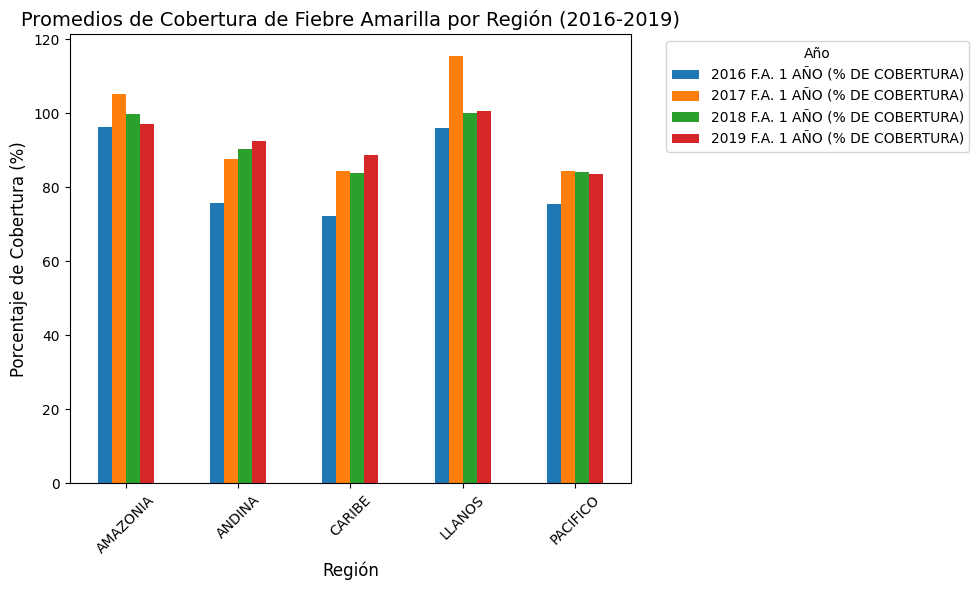

In [52]:
# Crear una gráfica de barras para los promedios por región
promedios_por_region[['2016 F.A. 1 AÑO (% DE COBERTURA)', 
                      '2017 F.A. 1 AÑO (% DE COBERTURA)', 
                      '2018 F.A. 1 AÑO (% DE COBERTURA)', 
                      '2019 F.A. 1 AÑO (% DE COBERTURA)']].plot(kind='bar', figsize=(10, 6))

# Configurar etiquetas y título
plt.title('Promedios de Cobertura de Fiebre Amarilla por Región (2016-2019)', fontsize=14)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Porcentaje de Cobertura (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

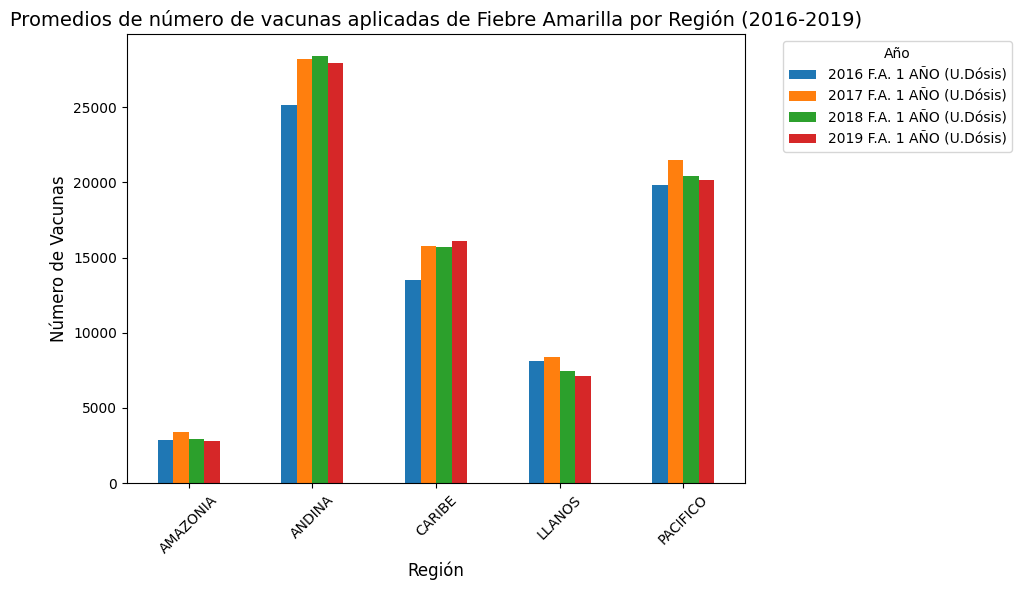

In [53]:
# Crear una gráfica de barras para los promedios por región
promedios_por_region[['2016 F.A. 1 AÑO (U.Dósis)', 
                      '2017 F.A. 1 AÑO (U.Dósis)', 
                      '2018 F.A. 1 AÑO (U.Dósis)', 
                      '2019 F.A. 1 AÑO (U.Dósis)']].plot(kind='bar', figsize=(10, 6))

# Configurar etiquetas y título
plt.title('Promedios de número de vacunas aplicadas de Fiebre Amarilla por Región (2016-2019)', fontsize=14)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Número de Vacunas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [54]:
# Calcular los promedios de cobertura por departamento para cada año
promedios_por_departamento = fiebre_filtrado.groupby('DEPARTAMENTOS').mean(numeric_only=True)[[
    '2016 F.A. 1 AÑO (% DE COBERTURA)',
    '2017 F.A. 1 AÑO (% DE COBERTURA)',
    '2018 F.A. 1 AÑO (% DE COBERTURA)',
    '2019 F.A. 1 AÑO (% DE COBERTURA)'
]]

# Mostrar los resultados
promedios_por_departamento.style.format("{:.2f}").set_caption("Promedios de Cobertura por Departamento")

,2016 F.A. 1 AÑO (% DE COBERTURA),2017 F.A. 1 AÑO (% DE COBERTURA),2018 F.A. 1 AÑO (% DE COBERTURA),2019 F.A. 1 AÑO (% DE COBERTURA)
DEPARTAMENTOS,,,,
AMAZONAS,101.30,96.40,89.70,93.70
ANTIOQUIA,77.10,86.70,85.90,89.10
ARAUCA,116.50,131.30,110.60,110.70
ATLANTICO,91.50,101.80,95.30,100.80
BARRANQUILLA,73.20,94.90,96.30,95.10
BOGOTA D.C.,77.80,82.20,80.00,81.60
BOLIVAR,61.10,77.10,74.50,83.80
BOYACA,84.10,91.70,94.70,93.60
BUENAVENTURA,47.10,55.10,60.30,62.80


In [55]:
# Encontrar el departamento con el mínimo y máximo porcentaje de cobertura por año
for year in ['2016', '2017', '2018', '2019']:
    col = f'{year} F.A. 1 AÑO (% DE COBERTURA)'
    min_dep = promedios_por_departamento[col].idxmin()
    min_val = promedios_por_departamento[col].min()
    max_dep = promedios_por_departamento[col].idxmax()
    max_val = promedios_por_departamento[col].max()
    print(f"Año {year}:")
    print(f"  Mínimo: {min_dep} ({min_val:.1f}%)")
    print(f"  Máximo: {max_dep} ({max_val:.1f}%)\n")

Año 2016:
  Mínimo: BUENAVENTURA (47.1%)
  Máximo: ARAUCA (116.5%)

Año 2017:
  Mínimo: BUENAVENTURA (55.1%)
  Máximo: PUTUMAYO (138.1%)

Año 2018:
  Mínimo: BUENAVENTURA (60.3%)
  Máximo: GUAINIA (118.2%)

Año 2019:
  Mínimo: BUENAVENTURA (62.8%)
  Máximo: ARAUCA (110.7%)



In [56]:
# Obtener la región con el promedio de cobertura mayor y menor por año
resultados_region = []
for year in ['2016', '2017', '2018', '2019']:
    col = f'{year} F.A. 1 AÑO (% DE COBERTURA)'
    max_region = promedios_por_region[col].idxmax()
    max_val = promedios_por_region[col].max()
    min_region = promedios_por_region[col].idxmin()
    min_val = promedios_por_region[col].min()
    resultados_region.append({
        'Año': year,
        'Región Máximo': max_region,
        'Cobertura Promedio Máxima': max_val,
        'Región Mínimo': min_region,
        'Cobertura Promedio Mínima': min_val
    })

pd.DataFrame(resultados_region)


,Año,Región Máximo,Cobertura Promedio Máxima,Región Mínimo,Cobertura Promedio Mínima
0,2016,AMAZONIA,96.266667,CARIBE,72.290909
1,2017,LLANOS,115.575000,CARIBE,84.327273
2,2018,LLANOS,99.950000,CARIBE,83.972727
3,2019,LLANOS,100.500000,PACIFICO,83.520000


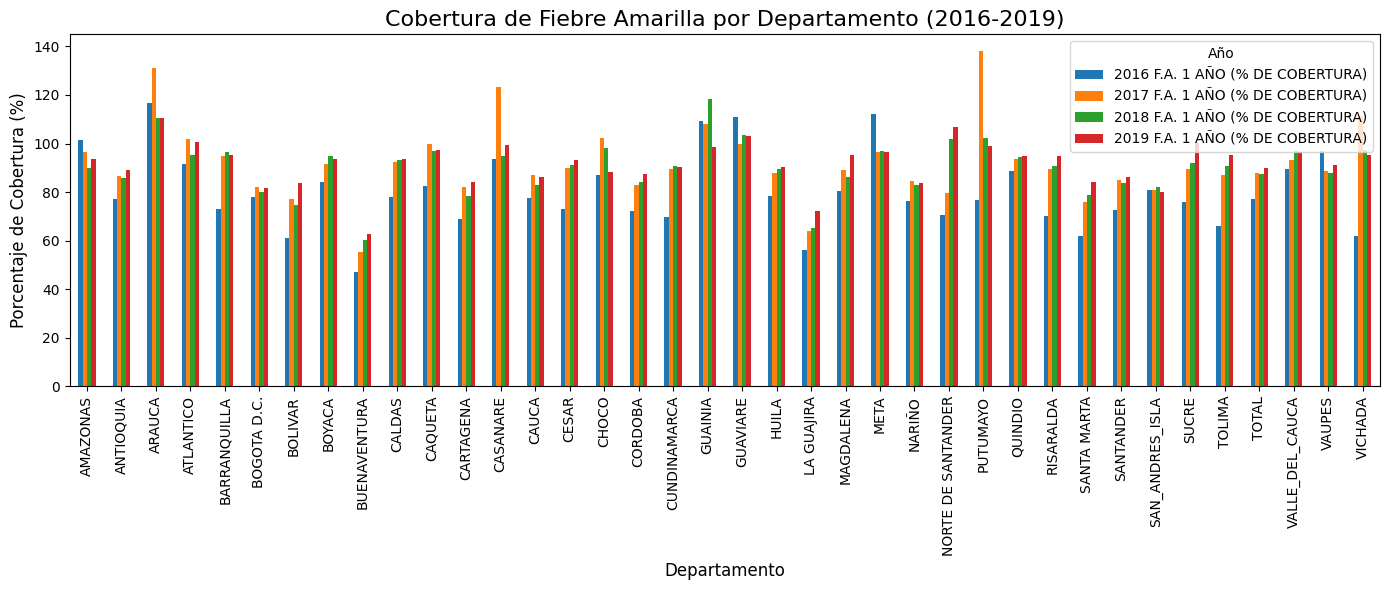

In [57]:
# Graficar la cobertura de fiebre amarilla por departamento para cada año
fig, ax = plt.subplots(figsize=(14, 6))
promedios_por_departamento.plot(kind='bar', ax=ax)
plt.title('Cobertura de Fiebre Amarilla por Departamento (2016-2019)', fontsize=16)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Porcentaje de Cobertura (%)', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

# Muertes

In [59]:
muertes = pd.read_excel('./MuertesFiebreAmarilla.xlsx', sheet_name = 'Muertes')
muertes

,DEPARTAMENTOS,2016,2017,2018,2019
0,AMAZONAS,1,0,0,0
1,ANTIOQUIA,1,0,0,0
2,ARAUCA,0,0,0,0
3,ATLANTICO,0,0,0,0
4,BARRANQUILLA,0,0,0,0
5,BOGOTA D.C.,0,0,0,0
6,BOLIVAR,0,0,0,0
7,CARTAGENA,0,0,0,0
8,BOYACA,0,0,0,0
9,CALDAS,0,0,0,0


### Revision de completitud

In [60]:
# Op1 Se ven el numero de valores nulos
porcentajeIncompletitudMuertes =  (100 * muertes.isnull().sum() / muertes.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porcentajeIncompletitudMuertes.index,
    "Completitud (%)": 100 - porcentajeIncompletitudMuertes.values,
    "Incompletitud (%)": porcentajeIncompletitudMuertes.values,
    "Numero de registros faltantes": porcentajeIncompletitudMuertes.values * muertes.shape[0] / 100
})

,Atributo,Completitud (%),Incompletitud (%),Numero de registros faltantes
0,DEPARTAMENTOS,100.0,0.0,0.0
1,2016,100.0,0.0,0.0
2,2017,100.0,0.0,0.0
3,2018,100.0,0.0,0.0
4,2019,100.0,0.0,0.0
